In [1]:
# set to true to utilize multiprocessing
cpus = 30
if False:
    import multiprocessing as mp
    mp.set_start_method("spawn")

In [2]:
import os 
import hmp 
import numpy as np
import xarray as xr
from mne.io import read_info

In [3]:
epoch_data_path = os.path.join('data/subjects/')#Declaring path where the eeg data is
subj_names = [x.split('.')[0] for x in os.listdir(epoch_data_path) if 'epo.fif' in x]#Extracting subject name based on the file name
subj_files = [epoch_data_path+x+'.fif' for x in subj_names]#Create a list of files that can be read from the folder

info = read_info(subj_files[0], verbose=False)

In [4]:
epoch_data =  hmp.utils.load_data('data/hmp_data/epoch_data.nc')

In [5]:
hmp_data = hmp.utils.transform_data(epoch_data, n_comp=4)

In [6]:
# parameters for the HMP model
event_width=50
location_corr_threshold=0.7
location_corr_duration=500

In [7]:
# set cpus=cpus to utilize multiprocessing
init = hmp.models.hmp(hmp_data, epoch_data, event_width=event_width, location_corr_threshold=location_corr_threshold, location_corr_duration=location_corr_duration)

First, we try use a backward estimating method. This function first estimates the maximal model (defined based on the event width and the minimum reaction time), then estimates the max_event - 1 solution by iteratively removing one of the events and picking the next solution with the highest likelihood (for more details see Borst & Anderson, 2021) and repeat this until the 1 event solution is reached.

In [9]:
backward = init.backward_estimation(max_events = 6)

Estimating all solutions for maximal number of events (6) with 1 pre-defined starting point and 0 random starting points
Estimating all solutions for 5 events
Estimating all solutions for 4 events
Estimating all solutions for 3 events
Estimating all solutions for 2 events
Estimating all solutions for 1 events


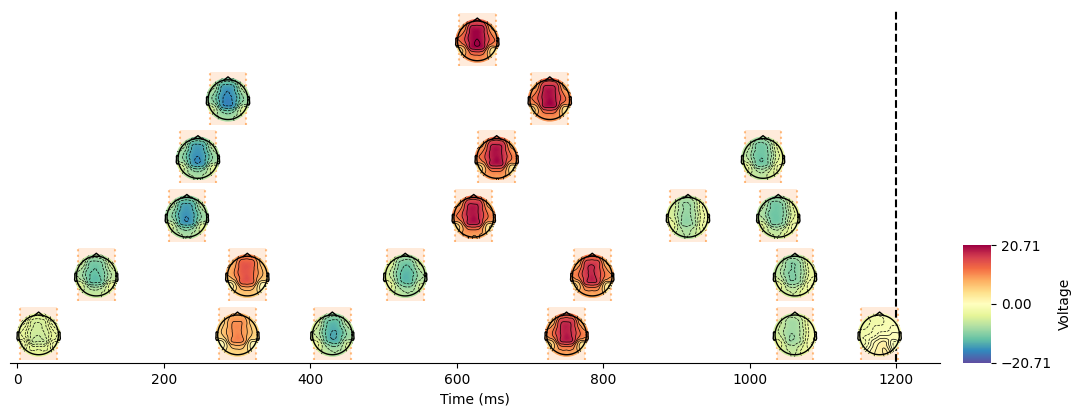

In [10]:
hmp.visu.plot_topo_timecourse(epoch_data, backward, info, init, as_time = True)

# uncomment to plot the development of the estimate
# hmp.visu.plot_estimate_development(backward, init, epoch_data, info, print_correlations=True)

In [1]:
estimates = init.fit(diagnostic=True, by_sample=True)

NameError: name 'init' is not defined

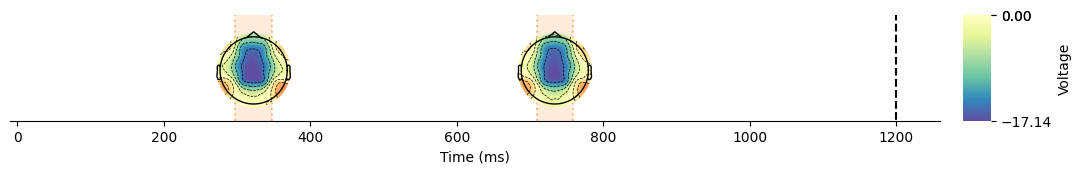

In [12]:
hmp.visu.plot_topo_timecourse(epoch_data, estimates, info, init, as_time = True)